## Shopify Winter 2021 - Intern Application
## Sneaker Store Analysis
### Prepared By: Nehel Malhotra


In [149]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

In [150]:
#Load dataset
df = pd.read_csv("dataset.csv",parse_dates=["created_at"])

In [151]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1863,39,738,536,4,cash,2017-03-01 00:08:09
1,1742,39,910,268,2,cash,2017-03-01 00:10:19
2,3229,97,912,324,2,cash,2017-03-01 00:14:12
3,1268,80,798,290,2,credit_card,2017-03-01 00:19:31
4,2690,49,799,258,2,credit_card,2017-03-01 00:22:25


In [152]:
df.shape

(5000, 7)

## Explore the data

In [153]:
#there are no missing values
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [154]:
#data types of features
df.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

Text(0.5, 1.0, 'Payment methods')

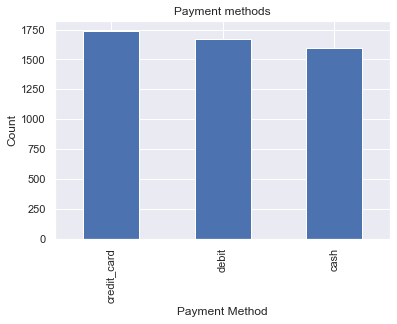

In [155]:
#Popular payment methods
df['payment_method'].value_counts().plot(kind="bar")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Payment methods")

In [156]:
#Get date and time of purchase
df["date"] = [d.date() for d in df['created_at']]
df["time"] = [d.time() for d in df['created_at']]

Text(0.5, 1.0, 'Sales during the month')

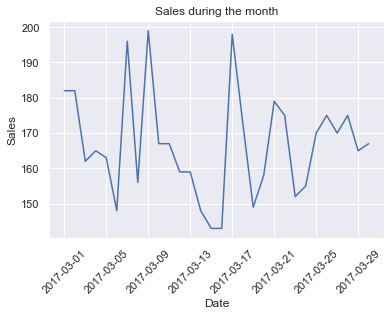

In [157]:
df.groupby("date").count()['order_id'].plot()
temp = plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales during the month")

Based on the above plot, there is a slight dip in sales during the middle of the month. We should definately prioratize more campaigns and promotions during the 2nd week.

Text(0.5, 1.0, 'Top 10 stores - Popularity')

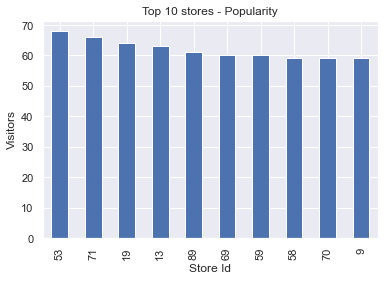

In [158]:
df['shop_id'].value_counts(sort=True)[:10].plot(kind="bar")
plt.xlabel("Store Id")
plt.ylabel("Visitors")
plt.title("Top 10 stores - Popularity")

In [159]:
df_orders = df.groupby('shop_id').sum()['order_amount'].reset_index().sort_values('order_amount',ascending = False)

In [160]:
#Store 42 has total sales of over $11M in just a month, lets see if this is because of a high price of sneakers or high number of orders
df_orders.iloc[:10,]

,shop_id,order_amount
41,42,11990176
77,78,2263800
88,89,23128
80,81,22656
5,6,22627
12,13,21760
58,59,21538
70,71,21320
18,19,20538
69,70,20241


In [161]:
df_42 = df[df['shop_id'] == 42]

In [162]:
df_42.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date,time
101,4422,42,736,704,2,credit_card,2017-03-01 12:19:49,2017-03-01,12:19:49
106,2019,42,739,352,1,debit,2017-03-01 12:42:26,2017-03-01,12:42:26
141,2492,42,868,704,2,debit,2017-03-01 18:33:33,2017-03-01,18:33:33
209,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,2017-03-02,04:00:00
210,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00,2017-03-02,04:00:00
427,2988,42,819,1056,3,cash,2017-03-03 09:09:25,2017-03-03,09:09:25
526,4232,42,962,352,1,cash,2017-03-04 00:01:19,2017-03-04,00:01:19
554,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,2017-03-04,04:00:00
636,410,42,904,704,2,credit_card,2017-03-04 14:32:58,2017-03-04,14:32:58
768,2767,42,970,704,2,credit_card,2017-03-05 10:45:42,2017-03-05,10:45:42


Looking at the sales of store 42, the unit price of a sneaker is $352. However there are multiple orders of 2,000 units of shoes.

In [163]:
df['price'] = df['order_amount']/df['total_items']

In [164]:
df['price'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: price, dtype: float64

By looking at the price, there is a wide spread of shoe prices. The minimum price is $$90$ and it can go as high as over $25k.

## Average order value (AOV)

It is important for a business to find the AOV for a given period, but for data with varying customers and prices its best if we classify the orders in two categories:

1. Customer - B2B or B2C
2. Sneaker Type - Regualar or Luxury



In [165]:
df["Customer"] = ["B2C" if order > 50 else "B2B" for order in df["total_items"]]
df["Type"] = ["Luxury" if price > 5000 else "Regular" for price in df["price"]]

Text(0.5, 1.0, '% of total orders')

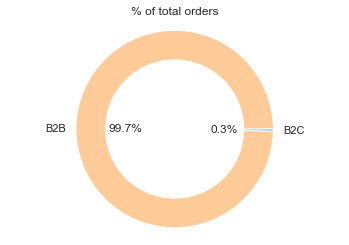

In [166]:
colors = ['#ffcc99','#66b3ff']

df.groupby("Customer").count()['order_amount'].plot.pie(autopct='%1.1f%%', startangle=0,colors=colors,pctdistance=0.5,label='')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title("% of total orders")

In [167]:
aov_customers = df.groupby("Customer").sum()['order_amount']/df.groupby("Customer").count()['order_amount']

In [168]:
aov_customers

Customer
B2B       754.091913
B2C    704000.000000
Name: order_amount, dtype: float64

Text(0.5, 1.0, '% of total orders')

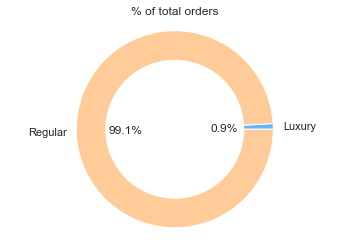

In [169]:
colors = ['#66b3ff','#ffcc99']

df.groupby("Type").count()['order_amount'].plot.pie(autopct='%1.1f%%', startangle=0,colors=colors,pctdistance=0.5,label='')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title("% of total orders")

In [170]:
aov_type = df.groupby("Type").sum()['order_amount']/df.groupby("Type").count()['order_amount']

In [171]:
aov_type

Type
Luxury     49213.043478
Regular     2717.367784
Name: order_amount, dtype: float64